# Visual search with k-NN

>*The idea here is to implement a little search engine based on the high-level image representation and k-nearest neighbors*
> * *Fit and tune a k-NN classifier*
> * *Pick an image from the test set and plot its 10 nearest neighbors from the train set*

>*Hint: take a look at the kneighbors() method from Scikit-learn k-NN estimators.*

I am going to start by loading features and labels from all the sets (train, validation and test sets) and the images from the train and test sets for the second part of the exercise (plot 10 nearest neighbors).

In [1]:
# Import numpy
import numpy as np

# Load features and labels from npz files
with np.load('train.npz', allow_pickle=False) as npz_file:
    X_train=npz_file['features']
    y_train=npz_file['labels']
    # for the second part of the exercise
    train_images = npz_file['images']

with np.load('valid.npz', allow_pickle=False) as npz_file:
    X_valid=npz_file['features']
    y_valid=npz_file['labels']

with np.load('test.npz', allow_pickle=False) as npz_file:
    X_test=npz_file['features']
    y_test=npz_file['labels']
    # for the second part of the exercise
    test_images = npz_file['images']

### Fit and tune a k-NN classifier

I am going to use a pipeline object to try standardization.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a k-NN pipeline
pipe = Pipeline([
    #('scaler', StandardScaler()), # better without standardization
    ('knn', KNeighborsClassifier())
])

I am going to build a grid of parameters to tune the number of neighbors, the weighting function and the distance metrics. Then, I am going to print the number of combinations.

In [3]:
from sklearn.model_selection import ParameterGrid

# A first grid of parameters - start with a few k values
grid = ParameterGrid({
    'knn__n_neighbors': np.arange(1,15), # k
    'knn__weights': ['uniform', 'distance'], # Weighting function
    'knn__p': [1, 2], # L1 and L2 distance metrics
})

# Print the number of combinations
print('Number of combinations:', len(grid))

Number of combinations: 56


For every combination of parameters, I am going to fit the estimator and save the accuracy on both validation and test sets.

In [4]:
# Save accuracy on test set
test_scores = []

# Enumerate combinations starting from 1
for i, params_dict in enumerate(grid, 1):
    # Print progress
    print('Combination {}/{}'.format(
        i, len(grid) # Total number of combinations
    ))
    
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_train, y_train)

    # Save accuracy on validation set
    valid_accuracy=pipe.score(X_valid, y_valid)
    params_dict['valid accuracy'] = '{:.3f}'.format(valid_accuracy)
    
    # Save accuracy on test set
    test_accuracy=pipe.score(X_test, y_test)
    params_dict['test accuracy'] ='{:.3f}'.format(test_accuracy)

    # Save result
    test_scores.append(params_dict)

print('done')

Combination 1/56
Combination 2/56
Combination 3/56
Combination 4/56
Combination 5/56
Combination 6/56
Combination 7/56
Combination 8/56
Combination 9/56
Combination 10/56
Combination 11/56
Combination 12/56
Combination 13/56
Combination 14/56
Combination 15/56
Combination 16/56
Combination 17/56
Combination 18/56
Combination 19/56
Combination 20/56
Combination 21/56
Combination 22/56
Combination 23/56
Combination 24/56
Combination 25/56
Combination 26/56
Combination 27/56
Combination 28/56
Combination 29/56
Combination 30/56
Combination 31/56
Combination 32/56
Combination 33/56
Combination 34/56
Combination 35/56
Combination 36/56
Combination 37/56
Combination 38/56
Combination 39/56
Combination 40/56
Combination 41/56
Combination 42/56
Combination 43/56
Combination 44/56
Combination 45/56
Combination 46/56
Combination 47/56
Combination 48/56
Combination 49/56
Combination 50/56
Combination 51/56
Combination 52/56
Combination 53/56
Combination 54/56
Combination 55/56
Combination 56/56
d

I am going to save the results in a dataframe and sort them by the accuracy on validation sets.

In [5]:
import pandas as pd
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Print scores
scores_df.sort_values(by='valid accuracy', ascending=False).head(5)

,knn__n_neighbors,knn__p,knn__weights,test accuracy,valid accuracy
20,6,1,uniform,0.983,0.921
28,8,1,uniform,0.967,0.899
35,9,2,distance,0.983,0.899
22,6,2,uniform,0.967,0.899
6,2,2,uniform,0.950,0.899


I am going to save the test accuracy given by the combination of parameters with the highest validation accuracy in an csv file so that we can compare the results at the end.

In [6]:
# save results
results=pd.DataFrame({
        'model': ['k-NN'],
        'test_accuracy': scores_df.sort_values(by='valid accuracy', ascending=False).iloc[0,3]
    })

In [7]:
# save results in csv file
results.to_csv('results.csv', index=False)

### Pick an image from the test set and plot its 10 nearest neighbors from the train set

Let's pick one image from the test set and plot it.

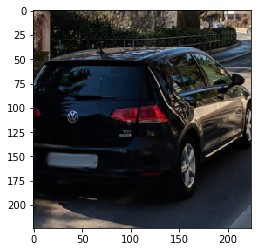

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# pick one image from the test set
plt.imshow(test_images[15]);

In order to find the 10 nearest neighbors, I am going to fit the train set with the NearestNeighbors unsupervised learning  using the parameters that lead to the best validation accuracy.

In [9]:
# Unsupervised learner for implementing neighbor searches
from sklearn.neighbors import NearestNeighbors

# use n=6 and p=1 as these parameters had the best validation accuracy 
neigh = NearestNeighbors(n_neighbors=6, p=1)
# train with the train set
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=6, p=1, radius=1.0)

Then I am going to use the kneighbors() method from Scikit-learn k-NN estimators to get the 10 nearest neighbors. I am going to apply this method to the test set as I want to get the neighbors of a test set image and get the row corresponding to the image I selected.

In [10]:
nearest_neighbors=neigh.kneighbors(X=X_test, n_neighbors=10, return_distance=False)[15]

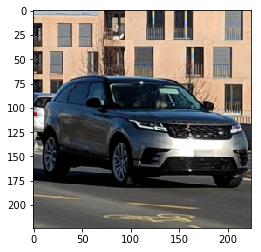

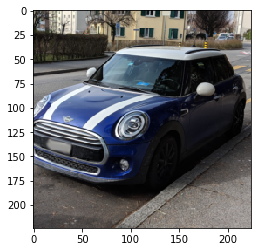

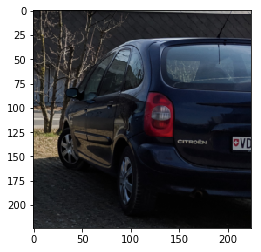

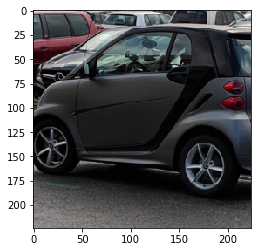

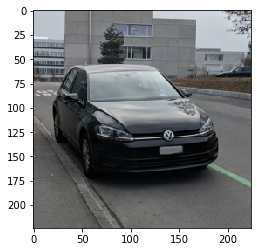

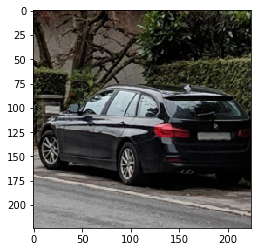

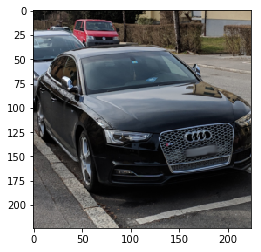

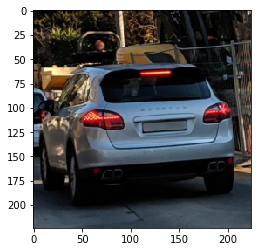

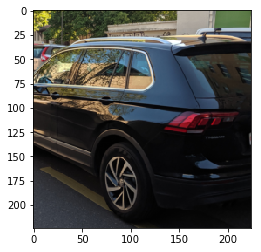

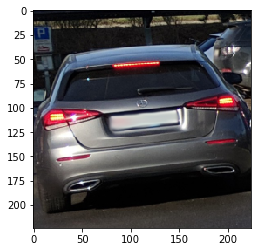

In [11]:
# Plot the 10 nearest neighbors from the train set 
for neighbor in nearest_neighbors:
    plt.imshow(train_images[neighbor])
    plt.show()